# Double-Pendulum using Lagrangian Formulation

Includes a DoublePendulum class that incorporates Euler-Lagrange equations that are solved for motion of a double pendulum. 

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from IPython.display import Image

## Double-Pendulum Lagrangian

The Lagrangian for the double pendulum with parameters described by the schematic below:

In [2]:
Image(url='https://www.mathworks.com/help/examples/symbolic/win64/AnimationAndSolutionOfDoublePendulumMotionExample_01.png')

can be expressed as:

$\begin{align}
  \mathcal{L}(\theta_1,\theta_2,\dot\theta_1,\dot\theta_2) = \frac12 (m_1 + m_2) L_1^2 \dot\theta_1^2 + \frac12 m_2 L_1^2 \dot\theta_2^2 + m_2 L_1 L_2 \dot\theta_1 \dot\theta_2 \cos(\theta_2 - \theta_1) - (m_1 + m_2) g L_1 (1 - \cos\theta_1) - m_2 g L_2 (1 - \cos\theta_2)
\end{align}$,

with the corresponding Euler-Lagrange equations:

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial \theta_1} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_1} \; \rightarrow \; - (m_1 + m_2) g \sin(\theta_1)\: = \:L_1 \ddot\theta_1 (m_1 + m_2) + m_2 L_2 \ddot\theta_2 \cos(\theta_2 - \theta_1) - m_2 L_2 \dot\theta_2^2 \sin(\theta_2 - \theta_1)
\end{align}$

$\begin{align}
    \frac{\partial\mathcal{L}}{\partial \theta_2} = \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\theta_2} \; \rightarrow \; - m_2 g \sin(\theta_2)\: = \:m_2 L_2 \ddot\theta_2 +  m_2 L_1 \ddot\theta_1\cos(\theta_2 - \theta_1) + m_2 L_1 \dot\theta_1^2 \sin(\theta_2 - \theta_1)
\end{align}$,

which are solved using the solve_ivp function in the class below to generate plots of the angles in time and create an animation of the system.

In [3]:
class DoublePendulum():
    """
    DoublePendulum class implements the parameters and differential equations for 
    a double pendulum. 
     
    Parameters
    ----------
    g : float
        gravitational acceleration
    L1 : float
        length of first string
    L2 : float
        length of second string
    m1 : float
        mass connected to first string 
    m2 : float
        mass connected to second string 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self,
                 g=1.,
                 L1=1.,
                 L2=1.,
                 m1=1.,
                 m2=1.
                ):
        self.g = g
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
     
    def dy_dt(self, t, y):
        """
        This function returns the solutions to diff eqs d^2theta/dt^2 (for both masses) from 
        rearranging the E_L equations above. 
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = theta1(t), y[1] = theta2(t), y[2] = dtheta1/dt, y[3] = dtheta2/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        theta1_ddot = (-(self.m1+self.m2)*self.g*np.sin(y[0]) + self.m2*self.g*np.sin(y[1])*np.cos(y[0]-y[1]) \
                       -self.m2*np.sin(y[0]-y[1])*(self.L1*np.cos(y[0]-y[1])*y[2]**2 \
                                                   + self.L2*y[3]**2))/(self.L1*(self.m1 + self.m2 - self.m2*np.cos(y[0]-y[1])**2))
        
        theta2_ddot = -self.g/self.L2*np.sin(y[1]) - self.L1/self.L2*theta1_ddot*np.cos(y[1]-y[0]) - self.L1/self.L2*y[2]**2*np.sin(y[1]-y[0])
        
        return [y[2], y[3], theta1_ddot, theta2_ddot]
    
    def solve_ode(self, t_pts, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0,
                abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta2_0, theta1_dot_0, theta2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                            y, t_eval=t_pts, 
                            atol=abserr, rtol=relerr)
        theta1, theta2, theta1_dot, theta2_dot = solution.y

        return [theta1, theta2, theta1_dot, theta2_dot]
    
    

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, semilogy_e=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (semilogy_e):
        line, = ax.semilogy(x, y, base=np.e, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')
theta1_dot_labels = (r'$t$', r'$\dot\theta_1(t)$')
theta2_dot_labels = (r'$t$', r'$\dot\theta_2(t)$')
state_space_1_labels = (r'$\theta_1$', r'$\dot\theta_1$')
state_space_2_labels = (r'$\theta_2$', r'$\dot\theta_2$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 80.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

# Input parameters for the DP system: 
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 10.
g = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(g=g, L1=L1, L2=L2, m1=m1, m2=m2)


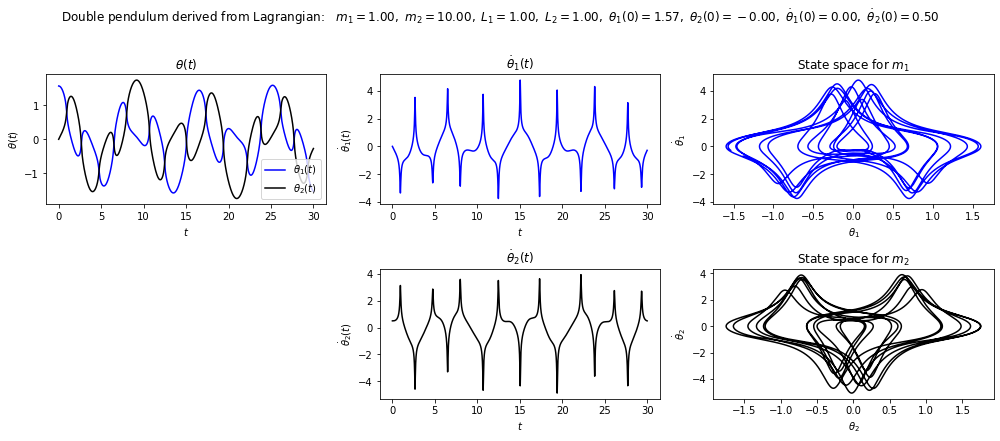

In [10]:
# initial conditions for both masses:
theta1_0 = np.pi/2
theta2_0 = -0.
theta1_dot_0 = 0.
theta2_dot_0 = 0.5
theta1, theta2, theta1_dot, theta2_dot = p1.solve_ode(t_pts, theta1_0, theta2_0, theta1_dot_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(14,6))
overall_title = 'Double pendulum derived from Lagrangian:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f},$' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$'

fig.suptitle(overall_title, va='baseline')
    
# first plot: 2-in-1 graph of theta vs time for both masses 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], # theta_1 plot
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=rf'$\theta_1(t)$', 
            title=rf'$\theta(t)$', 
            ax=ax_a)
start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], # theta_2 plot
            color='black',
            label=rf'$\theta_2(t)$',
            ax=ax_a)    
                              
# second plot: theta1_dot plot (for m1)
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta1_dot[start : stop], 
            axis_labels=theta1_dot_labels, 
            color='blue',
            label=None, 
            title=rf'$\dot\theta_1(t)$', 
            ax=ax_b)    

# third plot: state space plot for m1 (from t=30+ to ensure transient behavior is not included)
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, 30., t_end)    
plot_y_vs_x(theta1[start : stop], theta1_dot[start : stop], 
            axis_labels=state_space_1_labels, 
            color='blue',
            label=None, 
            title=rf'State space for $m_1$', 
            ax=ax_c)   
                              
# fourth plot: theta2_dot plot (for m2)
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end-50.)    
plot_y_vs_x(t_pts[start : stop], theta2_dot[start : stop], 
            axis_labels=theta2_dot_labels, 
            color='black',
            label=None, 
            title=rf'$\dot\theta_2(t)$', 
            ax=ax_e)    

# fifth plot: state space plot for m2 (same time frame as m1)
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, 30., t_end)    
plot_y_vs_x(theta2[start : stop], theta2_dot[start : stop], 
            axis_labels=state_space_2_labels, 
            color='black',
            label=None, 
            title=rf'State space for $m_2$', 
            ax=ax_f)    


fig.tight_layout()
fig.savefig('double_pendulum_final_hw.png', bbox_inches='tight')  

The state space plots presented here serve as the first piece of observational evidence of the double-pendulum system being chaotic. Each of the paths the masses take in state space is unique (in general), which gives the plots the appearance of "filling in". This is because each "back and forth" the masses take in real space is unique – they each have a different period. 

## Sensitivity to Initial Conditions:
Chaos is also indicated by the divergence of the position of 2 masses with nearly identical, although slightly differing, initial conditions. This indicates there is no common attractor that transients tend toward.

In [12]:
# DP input parameters:
L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate the pendulum 
p2 = DoublePendulum(g=g, L1=L1, L2=L2, m1=m1, m2=m2)

# label for the delta_theta plot
del_theta_labels = (r'$t$', r'$|\Delta\theta$|')

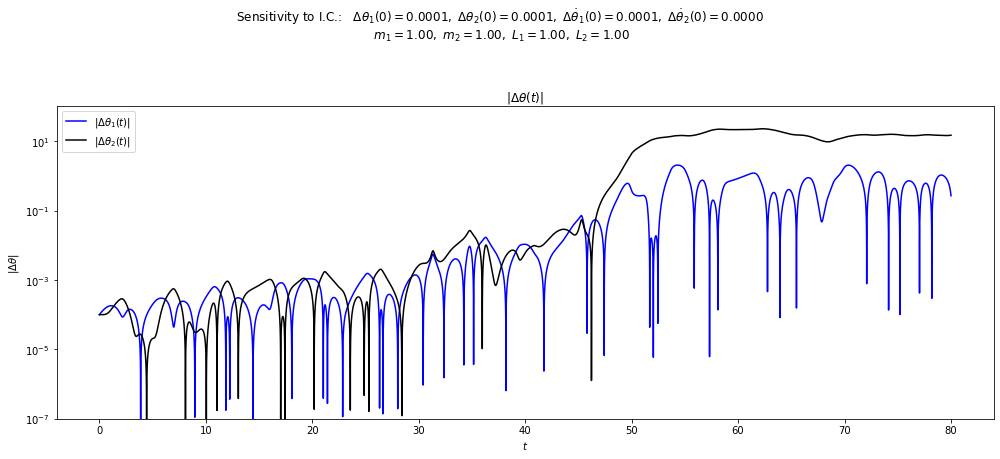

In [14]:
# 2 different sets of initial conditions to compare

# first set:
theta1_0_1 = np.pi/2
theta2_0_1 = np.pi/2
theta1_dot_0_1 = 0.
theta2_dot_0_1 = 0.

del_theta1_0 = 0.0001
del_theta1_dot_0 = 0.0001
del_theta2_0 = 0.0001
del_theta2_dot_0 = 0.

# second set:
theta1_0_2 = theta1_0_1 + del_theta1_0
theta2_0_2 = theta2_0_1 + del_theta2_0
theta1_dot_0_2 = theta1_dot_0_1 + del_theta1_dot_0
theta2_dot_0_2 = theta2_dot_0_1 + del_theta2_dot_0

# solve for the 2 cases:
theta1_1, theta2_1, theta1_dot_1, theta2_dot_1 = p2.solve_ode(t_pts, theta1_0_1, theta2_0_1, theta1_dot_0_1, theta2_dot_0_1)
theta1_2, theta2_2, theta1_dot_2, theta2_dot_2 = p2.solve_ode(t_pts, theta1_0_2, theta2_0_2, theta1_dot_0_2, theta2_dot_0_2)

# vectors for the differences in position between the analogous masses from the 2 different DP systems
del_theta1 = np.absolute(theta1_2 - theta1_1)
del_theta2 = np.absolute(theta2_2 - theta2_1)


fig2 = plt.figure(figsize=(14,6))
overall_title2 = 'Sensitivity to I.C.:  ' + \
                rf' $\Delta\theta_1(0) = {del_theta1_0:.4f}, $' + \
                rf' $\Delta\theta_2(0) = {del_theta2_0:.4f}, $' + \
                rf' $\Delta\dot\theta_1(0) = {del_theta1_dot_0:.4f}, $' + \
                rf' $\Delta\dot\theta_2(0) = {del_theta2_dot_0:.4f}$' + '\n' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f}$'

fig2.suptitle(overall_title2, va='baseline')
    
# 2-in-1 graph of del_theta for both masses
ax_a = fig2.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], del_theta1[start : stop], # del_theta for m1
            axis_labels=del_theta_labels, 
            color='blue',
            label=rf'$|\Delta\theta_1(t)|$', 
            title=rf'$|\Delta\theta(t)|$', 
            semilogy=True,
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], del_theta2[start : stop], # del_theta for m2
            color='black',
            label=rf'$|\Delta\theta_2(t)|$',
            semilogy=True,
            ax=ax_a)

ax_a.set_ylim(1.e-7,1.e2)

fig2.tight_layout()
fig2.savefig('dp_chaos1_final_hw.png', bbox_inches='tight')  


The increasing separation in time between the pendulum masses confirms the system is highly sensitive to initial conditions, and hence, there is no attractor - this being a part of the definition of chaos. 